In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pycountry
import squarify
from collections import Counter
import warnings
import seaborn as sns
sns.set_style('white')
warnings.filterwarnings('ignore')
from scipy.stats import norm
pd.options.display.float_format = "{:.2f}".format
import re
import os
from matplotlib import cm
from wordcloud import WordCloud, STOPWORDS

In [2]:
kiva = pd.read_csv(r"Kiva\kiva_loans.csv")
kiva_loc = pd.read_csv(r"Kiva\kiva_mpi_region_locations.csv")

In [3]:
print('Kiva Shape: ',kiva.shape,'\n')
kiva = kiva.replace('The Democratic Republic of the Congo','Congo')

Kiva Shape:  (671205, 20) 



In [4]:
kiva.describe()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,671205.00,671205.00,671205.00,657698.00,671205.00,671205.00
mean,993248.59,786.00,842.40,178.20,13.74,20.59
std,196611.28,1130.40,1198.66,94.25,8.60,28.46
min,653047.00,0.00,25.00,9.00,1.00,0.00
25%,823072.00,250.00,275.00,126.00,8.00,7.00
50%,992780.00,450.00,500.00,145.00,13.00,13.00
75%,1163653.00,900.00,1000.00,204.00,14.00,24.00
max,1340339.00,100000.00,100000.00,536.00,158.00,2986.00


In [5]:
t1 = kiva.isnull().sum().sort_values(ascending=False)
p1 = (kiva.isnull().sum()/kiva.isnull().count()).sort_values(ascending=False)*100
m1 = pd.concat([t1, p1], axis=1, keys=['total_missing', '%_missing'])
m1.head()

,total_missing,%_missing
tags,171416,25.54
region,56800,8.46
funded_time,48331,7.20
partner_id,13507,2.01
use,4232,0.63


In [6]:
kiva.sample(1)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
537225,1197590,425.00,1750.00,Livestock,Agriculture,to buy some calves for fattening and resale,KG,Kyrgyzstan,Toktogul district,KGS,171.00,2016-12-02 07:53:19+00:00,2016-10-31 07:00:00+00:00,NaN,26.00,14,"volunteer_pick, #Elderly, #Animals, #Woman Own...",female,monthly,2016-12-02


In [7]:
kiva['loan_amount'].describe()

count   671205.00
mean       842.40
std       1198.66
min         25.00
25%        275.00
50%        500.00
75%       1000.00
max     100000.00
Name: loan_amount, dtype: float64

In [8]:
kiva['funded_amount'].describe()

count   671205.00
mean       786.00
std       1130.40
min          0.00
25%        250.00
50%        450.00
75%        900.00
max     100000.00
Name: funded_amount, dtype: float64

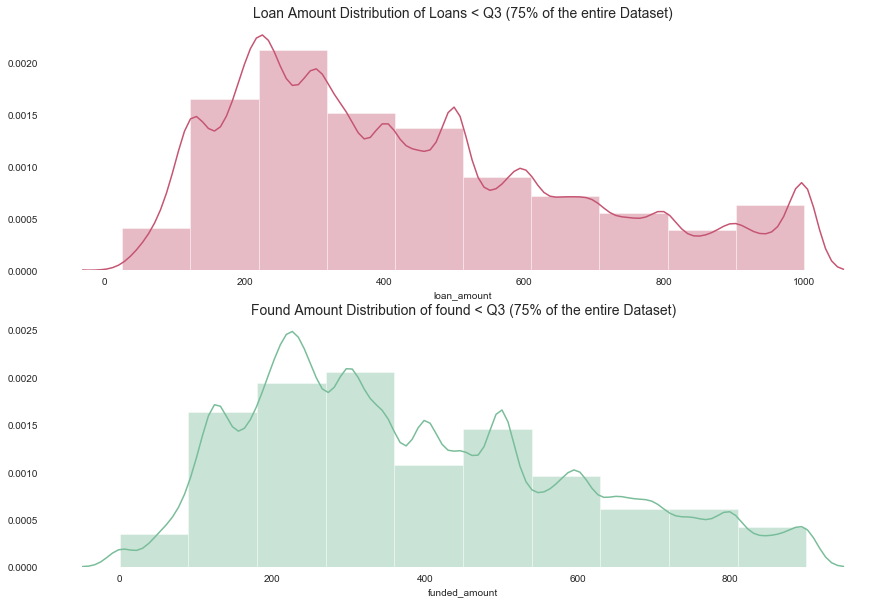

In [9]:
f,ax = plt.subplots(2,1,figsize=(15,10))
a0 = sns.distplot(kiva[kiva['loan_amount']<=1000.00]['loan_amount'], 
         color = '#c55572',bins=10,ax=ax[0])
a0.set_title('Loan Amount Distribution of Loans < Q3 (75% of the entire Dataset)',fontsize=14);
sns.despine(top=True, right=True, left=True, bottom=True, offset=None, trim=False)
a1 = sns.distplot(kiva[kiva['funded_amount']<=900.00]['funded_amount'], 
         color = '#79BD9A',bins=10,ax=ax[1])
a1.set_title('Found Amount Distribution of found < Q3 (75% of the entire Dataset)',fontsize=14);

# Loans by Countries

In [10]:
kiva.country.value_counts().head(5)

Philippines    160441
Kenya           75825
El Salvador     39875
Cambodia        34836
Pakistan        26857
Name: country, dtype: int64

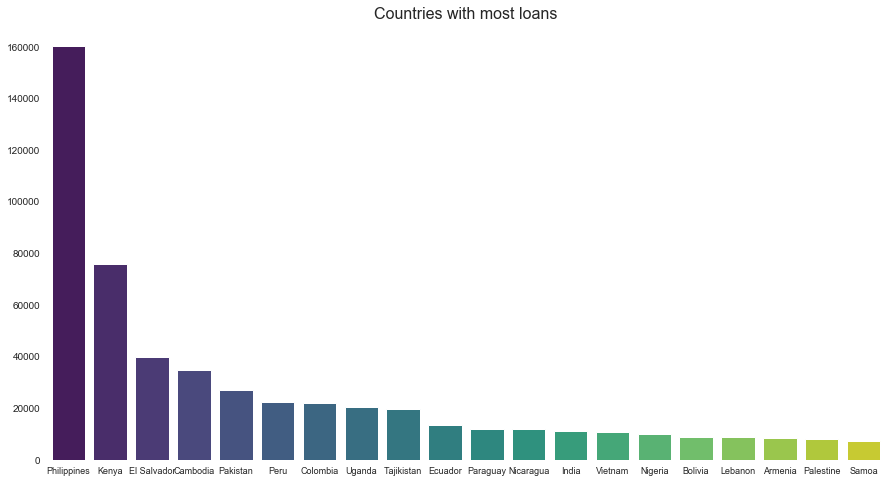

In [11]:
plt.figure(figsize=(15,8))
a=sns.barplot(x = kiva.country.value_counts().head(20).index,y=kiva.country.value_counts().head(20).values,palette='viridis')
plt.xticks(fontsize=9)
sns.despine(top=True, right=True, left=True, bottom=True, offset=None, trim=False)
a.set_title('Countries with most loans',fontsize=16);

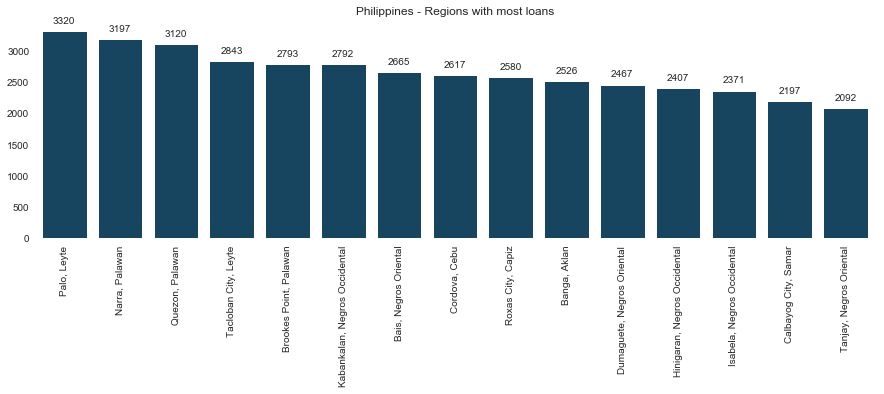

In [12]:
philippines = pd.DataFrame(kiva[kiva['country']=='Philippines'].region.value_counts()).head(15).reset_index()
fig, ax = plt.subplots(figsize=(15,4))
ax1=sns.barplot(x = philippines['index'],y=philippines.region,palette=['#0B486B'])
sns.despine(left=True, bottom=True)
plt.xticks(rotation = 90);
plt.xlabel('');
plt.ylabel('');
ax1.set_title('Philippines - Regions with most loans',fontsize=12)
for p in ax1.patches:
    ax1.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

In [13]:
l0 = kiva.groupby(['country'])['loan_amount'].sum().sort_values(ascending = False).head(15)
f0 = kiva.groupby(['country'])['funded_amount'].sum().sort_values(ascending = False).head(15)

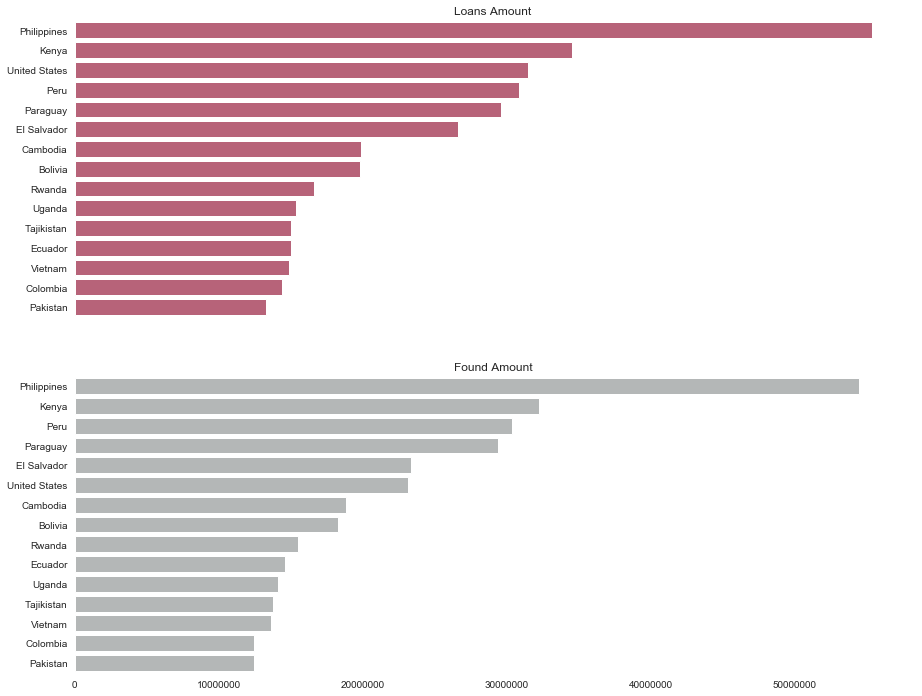

In [14]:
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
fig, ax = plt.subplots(2,1,figsize=(15,12),sharex=True)
ax1 = sns.barplot(y = l0.index,x=l0.values,ax=ax[0],palette=['#c55572'],orient='h')
sns.despine(left=True, bottom=True)
ax2 = sns.barplot(y = f0.index,x=f0.values,ax=ax[1],palette=['#b3b7b8'],orient='h')
ax1.set_title('Loans Amount')
ax2.set_title('Found Amount')
ax1.set_ylabel('')
ax1.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax2.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.xlabel('')
plt.ylabel('')
sns.despine(left=True, bottom=True);

In [15]:
l0f0 = kiva.groupby(['country'])['loan_amount','funded_amount'].sum().sort_values(by='funded_amount',ascending = False).head(15).reset_index()
l0f0_tidy = l0f0.melt(id_vars='country')

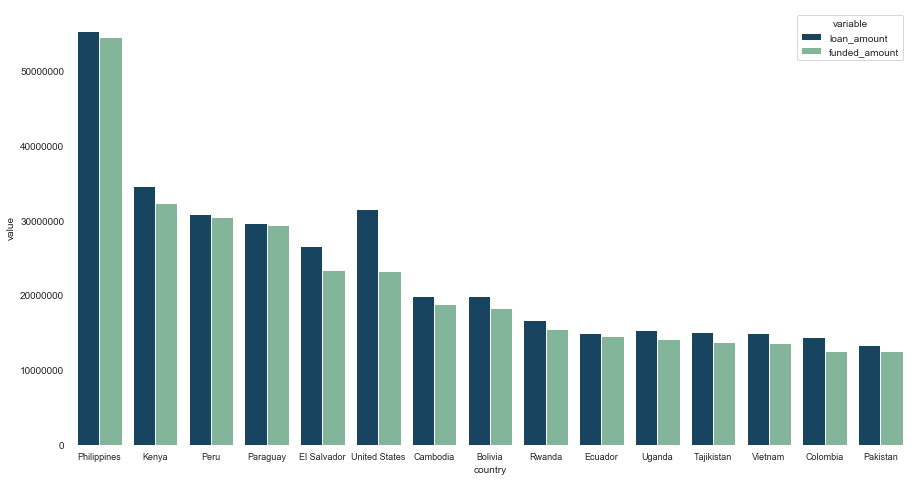

In [16]:
plt.figure(figsize=(15,8))
b = sns.barplot(y='value',x='country',hue='variable',data=l0f0_tidy,palette=['#0B486B','#79BD9A','#B5838D'])
plt.xticks(fontsize=9)
sns.despine(top=True, right=True, left=True, bottom=True, offset=None, trim=False)
b.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

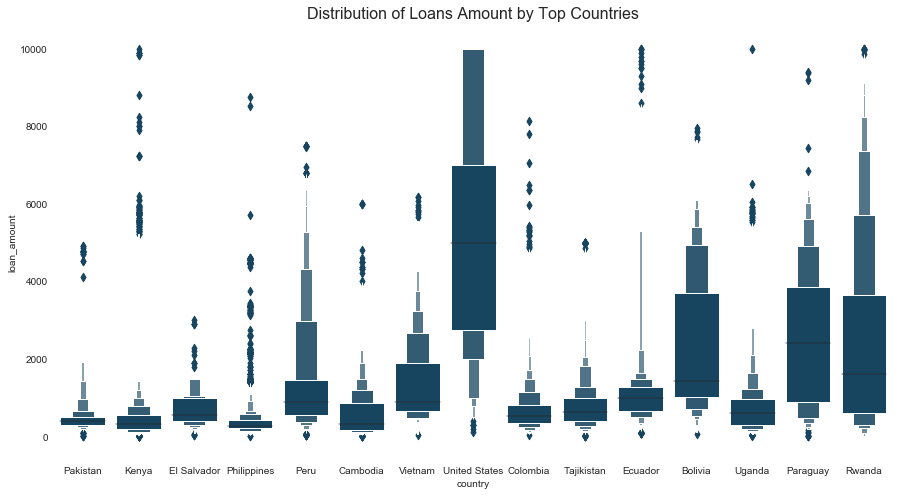

In [17]:
plt.figure(figsize=(15,8))
k1 = kiva[kiva['country'].isin(l0.index.tolist())]
k1 = k1[k1['loan_amount']<=10000.00]
a02 = sns.boxenplot(y=k1['loan_amount'],x=k1['country'],data=k1,palette=['#0B486B'],linewidth=0.7,
                  width=0.8),##boxprops=dict(alpha=.6)) #palette=['#c55572']
sns.despine(top=True, right=True, left=True, bottom=True, offset=None, trim=False)
plt.title('Distribution of Loans Amount by Top Countries',fontsize=16);

In [18]:
mean_loan = pd.DataFrame(kiva[kiva['country'].isin(kiva['country'].value_counts().head(50).index.tolist())].groupby(['country'])['loan_amount'].agg(['mean']).sort_values(by='mean',ascending = False).head(15)).reset_index()
mean_found = pd.DataFrame(kiva[kiva['country'].isin(kiva['country'].value_counts().head(50).index.tolist())].groupby(['country'])['funded_amount'].agg(['mean']).sort_values(by='mean',ascending = False).head(15)).reset_index()
mean_loan.head()

,country,mean
0,United States,5169.27
1,Congo,3763.64
2,Paraguay,2489.21
3,Rwanda,2471.61
4,Bolivia,2253.38


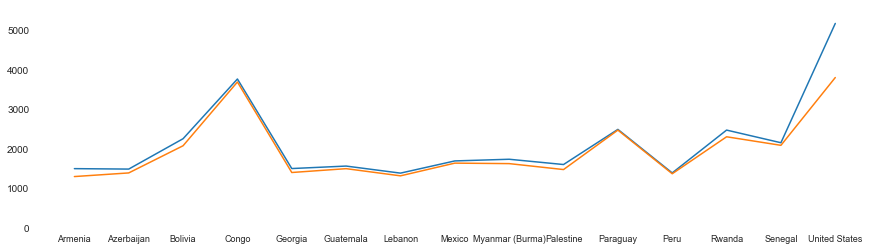

In [19]:
fig, ax = plt.subplots(figsize=(15,4))
ax1 = sns.lineplot(x = mean_loan['country'],y=mean_loan['mean'],palette=['#c55572'])
ax1.set_ylim(0,5500)
sns.despine(left=True, bottom=True)
ax2 = sns.lineplot(x = mean_found['country'],y=mean_found['mean'],palette=['#0B486B'])
plt.xlabel('');
plt.ylabel('');
plt.xticks(fontsize=9);

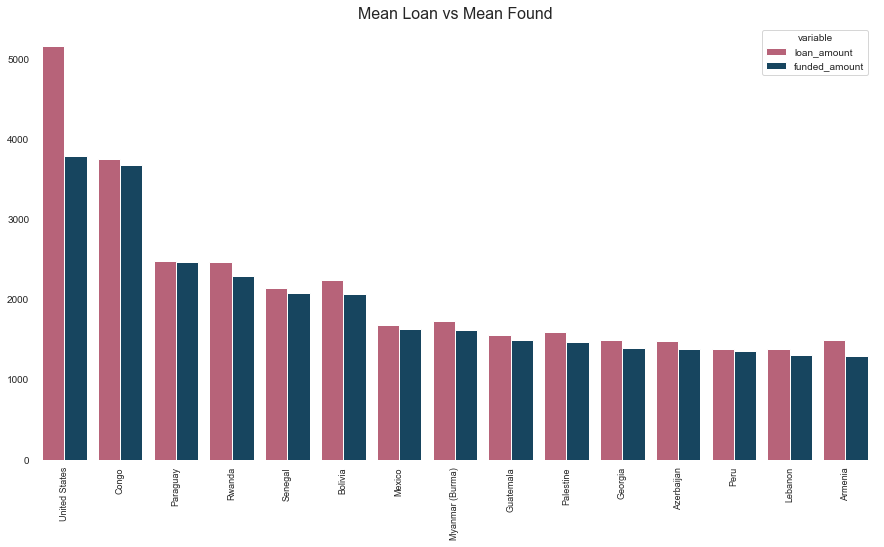

In [20]:
ovo = kiva[kiva['country'].isin(kiva['country'].value_counts().head(50).index.tolist())]
ovo = ovo.groupby(['country'])['loan_amount','funded_amount'].mean().sort_values(by='funded_amount',ascending = False).head(15).reset_index()
ovo_tidy = ovo.melt(id_vars='country')
plt.figure(figsize=(15,8))
c = sns.barplot(y='value',x='country',hue='variable',data=ovo_tidy,palette=['#c55572','#0B486B','#B5838D'])
plt.xticks(fontsize=9,rotation=90)
sns.despine(top=True, right=True, left=True, bottom=True, offset=None, trim=False)
c.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.xlabel('');
plt.ylabel('');
plt.title('Mean Loan vs Mean Found',fontsize=16);